<a href="https://colab.research.google.com/github/dubesar/Omniglot-Dataset/blob/master/Omniglot_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip 'imagedata.zip'

Archive:  imagedata.zip
   creating: imagedata/
   creating: imagedata/train/
   creating: imagedata/train/images_background/
   creating: imagedata/train/images_background/Alphabet_of_the_Magi/
   creating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_01.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_02.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_03.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_04.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_05.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_06.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Magi/character01/0709_07.png  
  inflating: imagedata/train/images_background/Alphabet_of_the_Mag

In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
path = Path('/content/imagedata/train')
data= ImageDataBunch.from_folder(path,train = '.',valid_pct=0.2, ds_tfms = get_transforms(),size = 224 , num_workers= 4).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data,models.resnet50)
learn.fit_one_cycle(5,1e-3,1e-2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 94112458.37it/s]


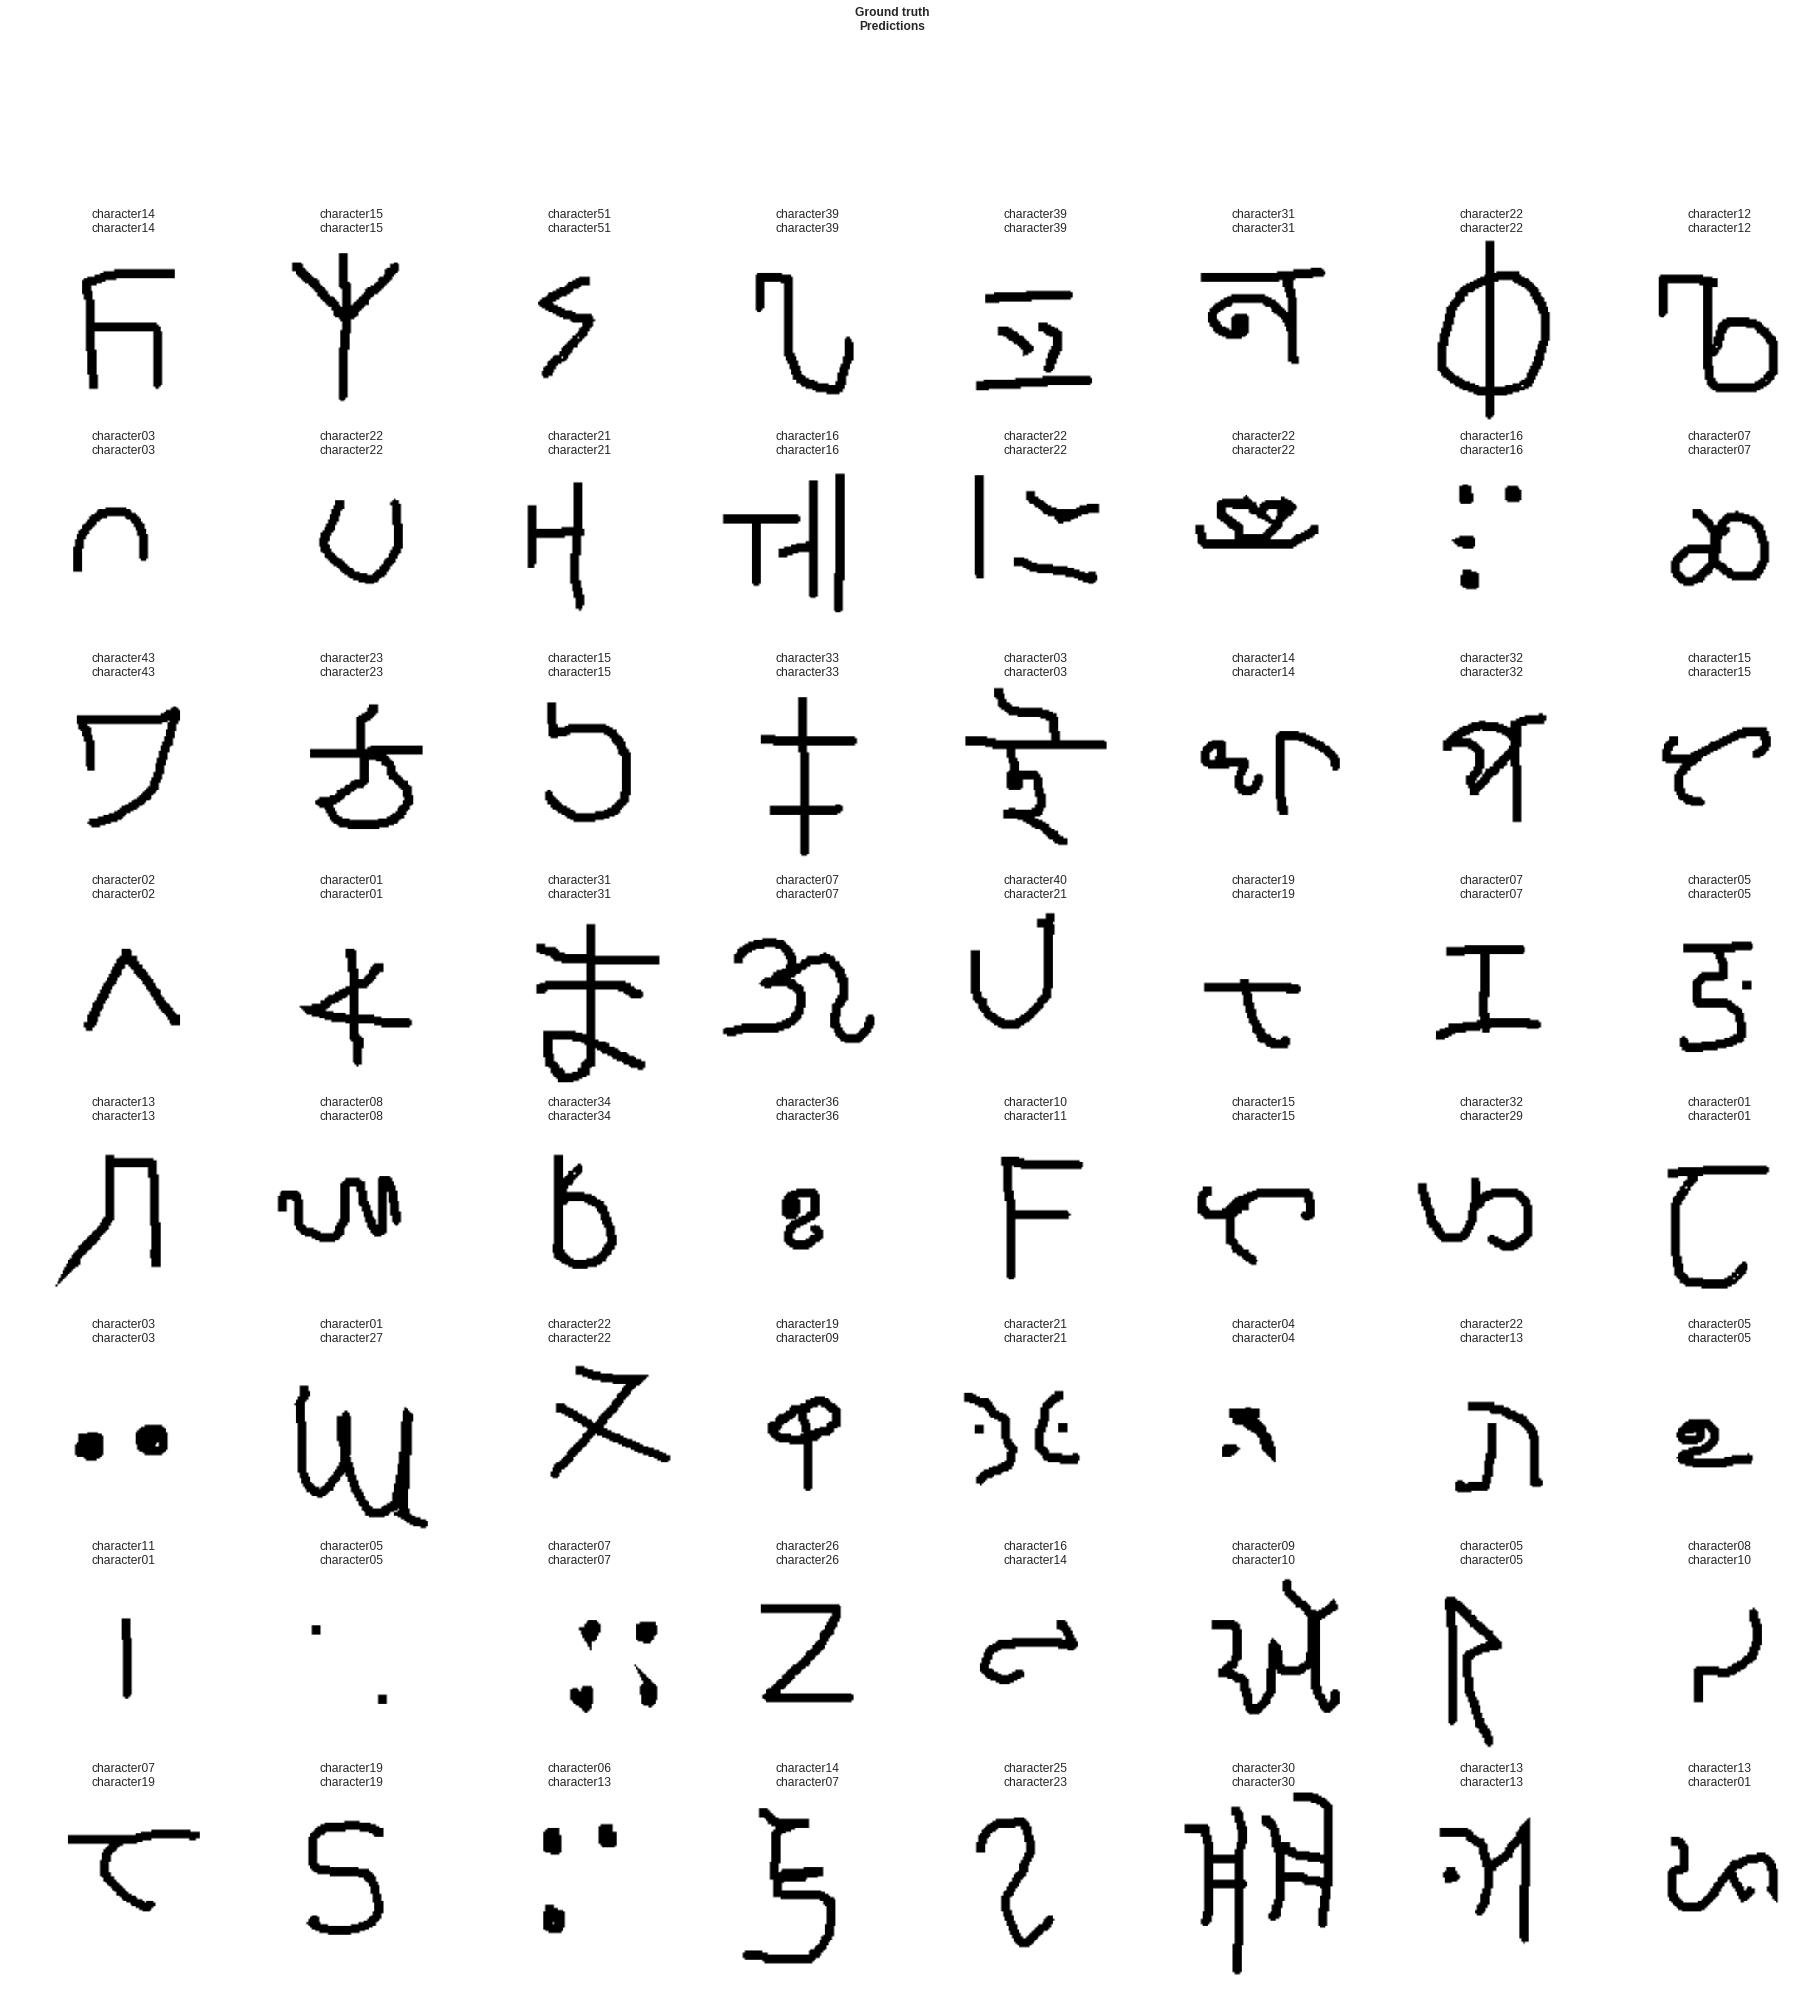

In [0]:
learn = create_cnn(data,models.resnet50,metrics = accuracy)
learn.unfreeze()
learn.fit_one_cycle(5, pct_start=0.8)
learn.show_results(rows=10)

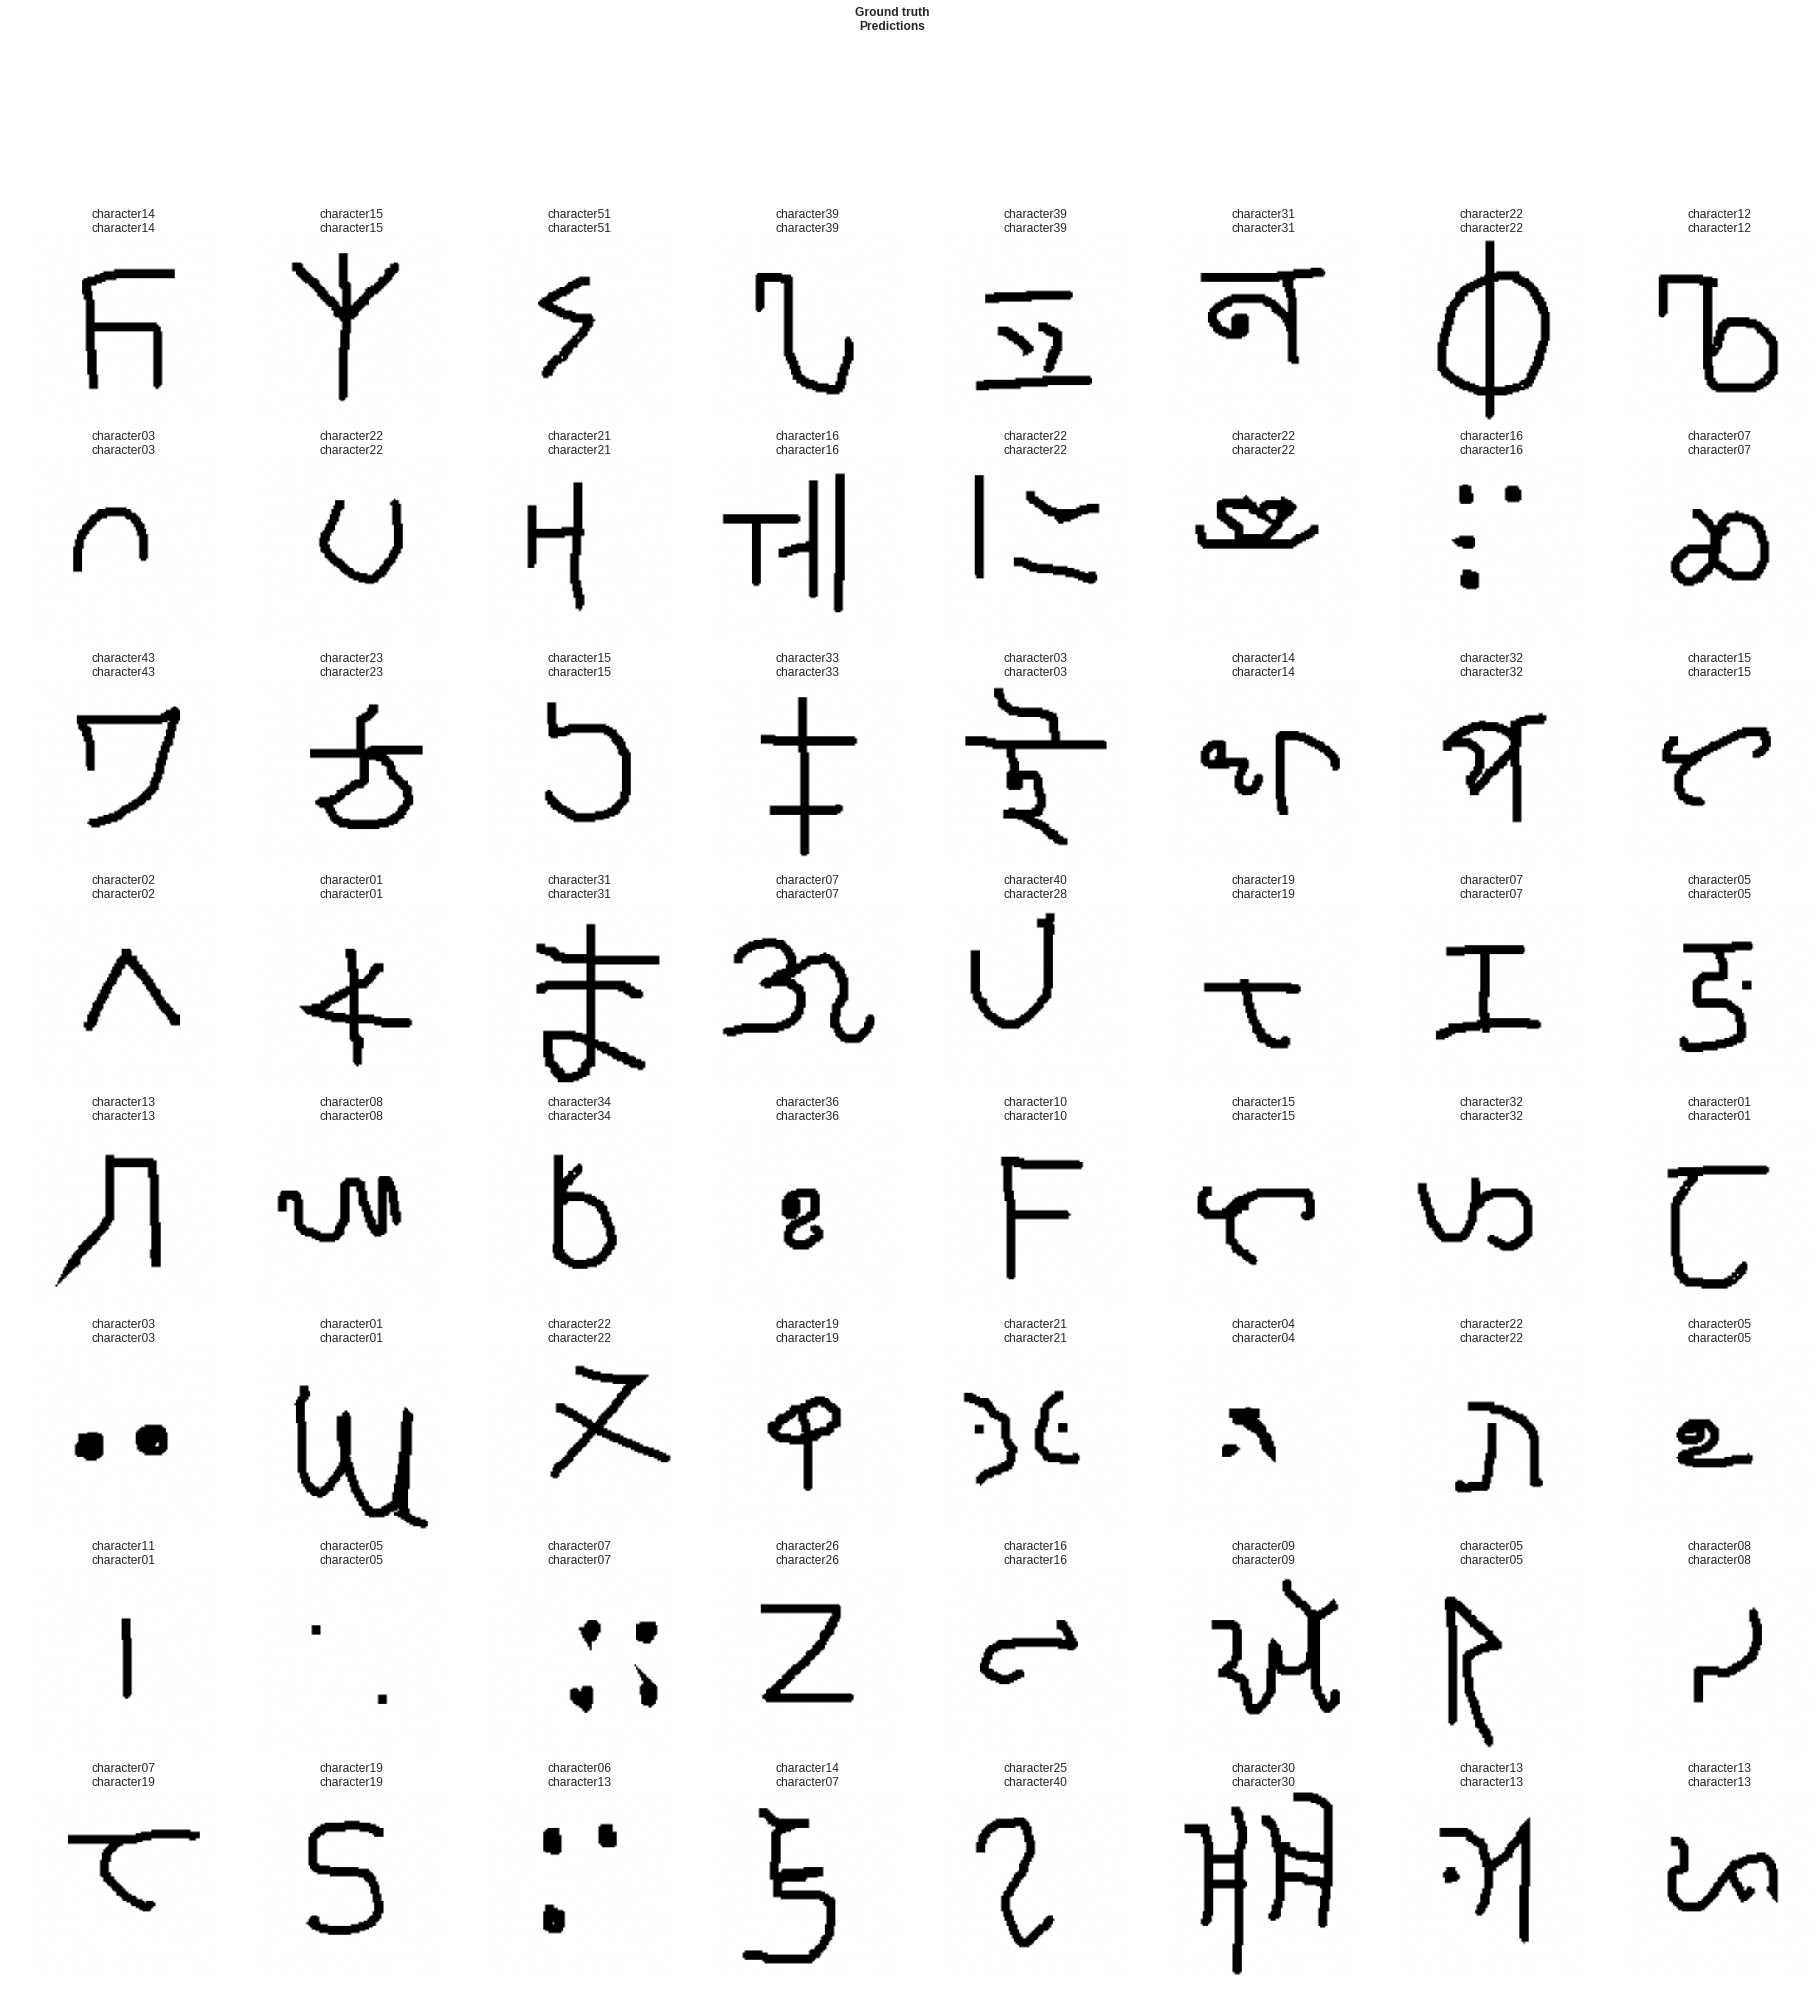

In [0]:
learn = create_cnn(data,models.resnet50,metrics = accuracy)
learn.unfreeze()
learn.fit_one_cycle(20, pct_start=0.8)
learn.show_results(rows=10)